In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
import uncertainties.unumpy as unp

In [2]:
phi, u_max1, u_min1, u_max2, u_min2, u_max3, u_min3 = np.loadtxt('../data/contrast.csv', unpack=True, delimiter=',')

phi = np.deg2rad(phi)

In [3]:
u_max = np.mean([u_max1, u_max2, u_max3], axis=0)
u_max_err = np.std([u_max1, u_max2, u_max3], axis=0)

u_min = np.mean([u_min1, u_min2, u_min3], axis=0)
u_min_err = np.std([u_min1, u_min2, u_min3], axis=0)

u_max = unp.uarray(u_max, u_max_err)
u_min = unp.uarray(u_min, u_min_err)

contrast = (u_max - u_min) / (u_max + u_min)

In [6]:
def contrast_func(phi, a, b, c):
    return a * np.abs(np.sin(b * phi + c))

from scipy.optimize import curve_fit

popt, pcov = curve_fit(contrast_func, phi, unp.nominal_values(contrast), sigma=unp.std_devs(contrast))

a = unc.ufloat(popt[0], np.sqrt(pcov[0, 0]))
b = unc.ufloat(popt[1], np.sqrt(pcov[1, 1]))
c = unc.ufloat(popt[2], np.sqrt(pcov[2, 2]))

phi_plot = np.linspace(0, np.pi, 1000)
contrast_plot = contrast_func(phi_plot, *popt)
print(a, b, c)
print(max(contrast))

0.867+/-0.016 2.022+/-0.015 -0.127+/-0.018
0.897+/-0.024


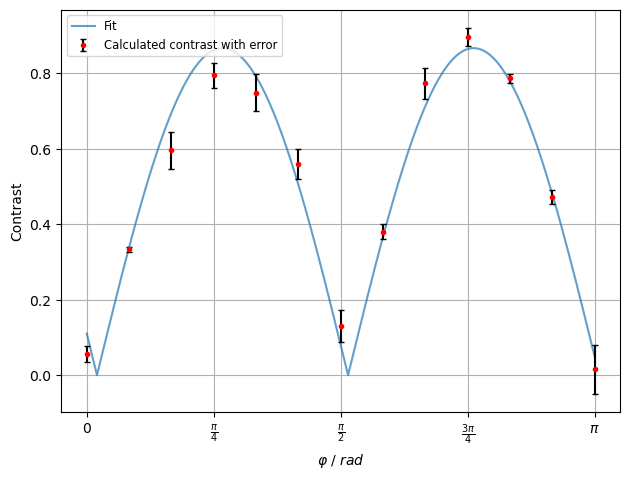

In [50]:
plt.plot(phi_plot, contrast_plot, label='Fit', alpha=0.7)
plt.errorbar(phi, unp.nominal_values(contrast), yerr=unp.std_devs(contrast), fmt='r.', ecolor='black', capsize = 2, capthick=1, label='Calculated contrast with error')
plt.xlabel(r'$\varphi$ / $rad$')
plt.ylabel('Contrast')
plt.legend(loc='upper left', fontsize='small')
plt.grid()
plt.tight_layout()
plt.xticks(np.linspace(0, np.pi, 5), ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])

plt.savefig('../build/contrast.pdf')